In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\user\Desktop\workspace\ML practice\Datasets\data_science_job.csv')

In [3]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [5]:
data.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [11]:
[var for var in data.columns if data[var].isnull().mean() < 0.05 and data[var].isnull().mean() > 0]

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
cols = [var for var in data.columns if data[var].isnull().mean() < 0.05 and data[var].isnull().mean() > 0]

In [10]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [13]:
data[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
6190,0.920,Full time course,High School,2.0,19.0
16662,0.767,no_enrollment,Graduate,2.0,75.0
12034,0.920,no_enrollment,Graduate,9.0,56.0
17438,0.939,no_enrollment,Graduate,13.0,17.0
15254,0.804,no_enrollment,Primary School,6.0,94.0


In [15]:
data['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [18]:
new_df=data[cols].dropna()

In [19]:
new_df.head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0


array([[<AxesSubplot:title={'center':'city_development_index'}>,
        <AxesSubplot:title={'center':'experience'}>],
       [<AxesSubplot:title={'center':'training_hours'}>, <AxesSubplot:>]],
      dtype=object)

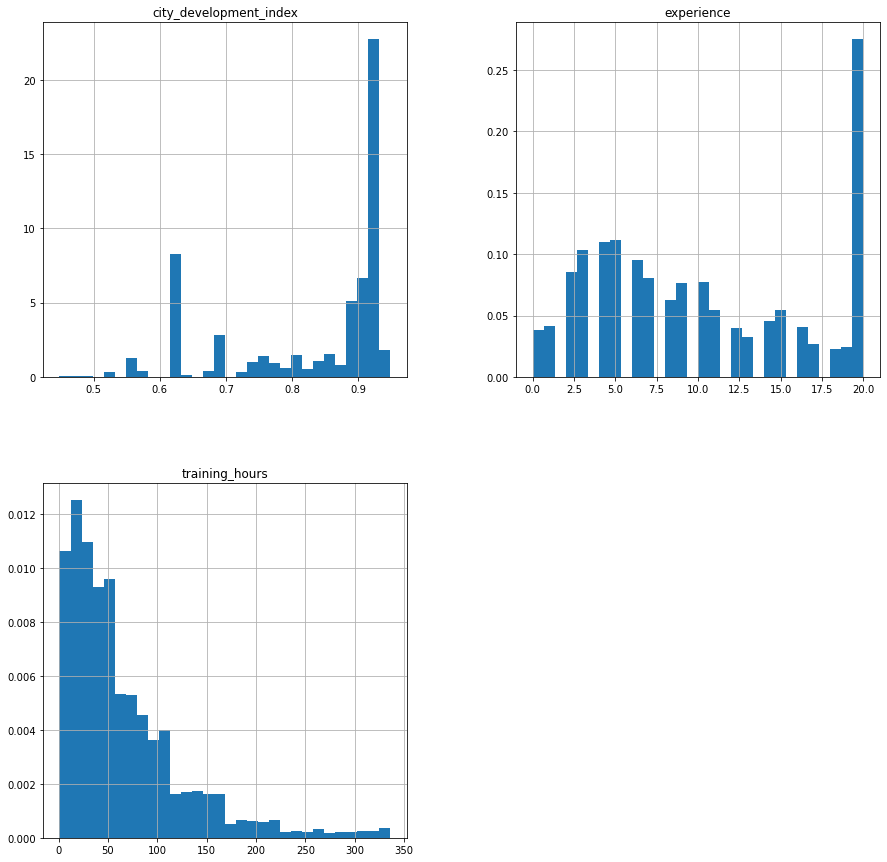

In [20]:
new_df.hist(bins=30,density=True,figsize=(15,15))

<AxesSubplot:>

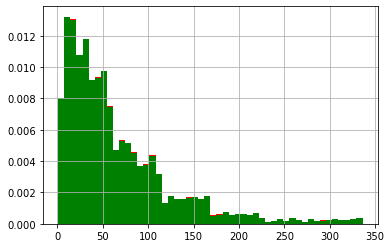

In [21]:
fig=plt.figure()
ax=fig.add_subplot(111)

data['training_hours'].hist(bins=50,ax=ax,density=True,color='red')
new_df['training_hours'].hist(bins=50,ax=ax,density=True,color='green')

<AxesSubplot:ylabel='Density'>

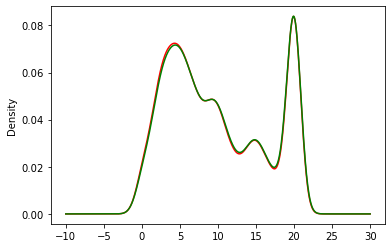

In [22]:
fig=plt.figure()
ax=fig.add_subplot(111)

data['experience'].plot.density(color='red')
new_df['experience'].plot.density(color='green')

In [25]:
temp=pd.concat([
    data['enrolled_university'].value_counts()/len(data),
    new_df['enrolled_university'].value_counts()/len(new_df)
],axis=1)
temp.columns=['original','cca']
temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079
